# Analizando Datos con PyData

* Objetivos de la Lección.
* Algunos métodos sumamente útiles.
* Operaciones con más de una DataFrame.
* Estrategias para un proyectos de Análisis de Datos.

## Objetivos de la Lección

A diferencia de las lecciones pasadas, para esta ocasión dedicamos la mitad de la seción a trabajar con un conjunto de datos o archivos, y la otra mitad con otro. 

Los objetivos en general son similares, pero cuentan con dos objetivos diferentes.

* El primer conjunto se usará para revisar : pipelines, agrupaciones y merge.
* El segundo grupo para implementar dos etapas de la metodología CRISP-DM (Data Undestanding y Data Preparation).

## Algunos métodos sumamente útiles.

Todos los objetos en Pandas (Series o DataFrame) cuentan con diferentes métodos, la lista es considerablemente amplia. Un conjunto de ellas resultan sumemente importantes en el momento de procesar la informacion contenida en una Serie o un DataFrame:

* apply()
* applymap()
* transform()
* filter()
* aggregate() o agg()
* groupby()

El siguiente código muestra algunos ejemplos:



In [0]:
#Se cargan los datos  

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("sample_data/california_housing_train.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### apply()

El método aplica una función sobre toda una columa.

Se considera el problema de tener los valores de la variable **median_house_value** cuenta con valores muy grandes con respecto a la mayoría de los valores. Para explorar esto desde otra pespectiva, aplicamos la función **logaritmo** sobre la variable.

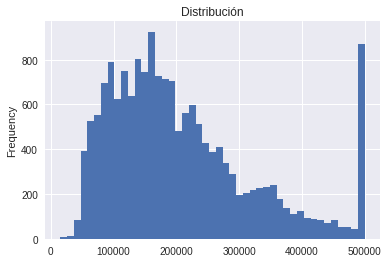

In [0]:
#Ejemplo del uso de la funcipon apply

#Datos originales
data.loc[:,'median_house_value'].plot.hist(bins=45,title='Distribución')


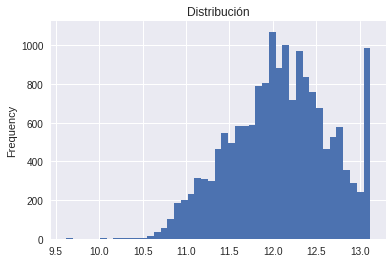

In [0]:
#Datos después de transformarlos
data.loc[:,'median_house_value'].apply(np.log).plot.hist(bins=45,title='Distribución')


### applymap()

El método aplica sobre cada valor de las columnas.

Suponemos el siguiente problema o detalle con los datos, las columnas **total_rooms** y 	**total_bedrooms** las consideramos que deben ser tratadas como valors enteros y no como flotantes. Así que aplicamos la operación a cada elemento.	

In [0]:
#Aplicación del método applymap

#Datos originales
data.loc[:,["total_rooms","total_bedrooms"]].head()

,total_rooms,total_bedrooms
0,5612.0,1283.0
1,7650.0,1901.0
2,720.0,174.0
3,1501.0,337.0
4,1454.0,326.0


In [0]:
#Datos después de aplicar applymap

data.loc[:,["total_rooms","total_bedrooms"]].applymap(lambda x: int(x)).head(30)



,total_rooms,total_bedrooms
0,5612,1283
1,7650,1901
2,720,174
3,1501,337
4,1454,326
5,1387,236
6,2907,680
7,812,168
8,4789,1175
9,1497,309


##  transform()


Este método aplica una funcion sobre el DataFrame, soporta no solo Dataframes sino también DataFrames provenientes de agrupaciones.

Como ejemplo, "normalizamos" los datos con la intención de dejar el valor de las variables **housing_median_age** y **median_income** con media 0 y varianza 1.

In [0]:
#Ejemplo de aplicación del método transform()

#Se aplica directo a dos columnas.
data.loc[:,['housing_median_age','median_income']].transform(lambda x:(x - x.mean()) / x.std())

,housing_median_age,median_income
0,-1.079639,-1.252506
1,-0.761850,-1.081451
2,-0.920744,-1.170071
3,-1.159087,-0.362590
4,-0.682402,-1.026424
5,0.032625,-0.282879
6,-0.285165,-0.632431
7,0.985994,-1.139989
8,0.429862,-0.893731
9,1.383231,-0.887127


En el siguiente ejemplo se aplica la normalización sobre las columnas agregadas.

In [0]:
data[['housing_median_age','median_income','median_house_value']]\
      .groupby('housing_median_age')\
      .agg('max')\
      .transform(lambda x:(x - x.mean()) / x.std())\
      .head()


,median_income,median_house_value
housing_median_age,,
1.0,-3.667378,-7.072428
2.0,-1.378784,0.138675
3.0,-0.739036,0.138675
4.0,0.182299,0.138675
5.0,-0.218503,0.138675


*Nota: en apariencia parace poco relevante el método anterior, pero se debe de considerar que un DataFrame después de alguna agrupación cambia su forma y puede dejar de ser 2-dimensional, en cierto sentido.*

## filter()

Este método te permite elegir columnas o filas.

El primer ejemplo es parecido a lo que uno puede hacer con el método *.loc()*, pero algunas operaciones u opciones para hacer esta selección de filas o columnas solo se tiene en este método.

El primer ejemplo solo elige dos columnas indicando el nombre.

In [0]:
# Aplicación del método filter

# Selección de dos columnas
data[['housing_median_age','total_rooms']].head()

,housing_median_age,total_rooms
0,15.0,5612.0
1,19.0,7650.0
2,17.0,720.0
3,14.0,1501.0
4,20.0,1454.0


In [0]:
# Selección de las columnas solo indicando parte de la palabra del nombre
data.filter(like='m',axis=1).head()

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value
0,15.0,5612.0,1283.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1.8200,80100.0
2,17.0,720.0,174.0,1.6509,85700.0
3,14.0,1501.0,337.0,3.1917,73400.0
4,20.0,1454.0,326.0,1.9250,65500.0


### aggregation or agg

Este método como su nombre lo dice, "agrega" los datos. Con esto se indica que se aplica una operación o función y se obtiene un resultado.

En el siguiente ejemplo se usa el método para conocer aspectos estádisticos de dos variables.

In [0]:
#Se aplica el método agg o aggregation

#Se aplica sobre dos columnas.
data[['median_income','median_house_value']].agg(['min','max','mean','median','var'])

,median_income,median_house_value
min,0.499900,1.499900e+04
max,15.000100,5.000010e+05
mean,3.883578,2.073009e+05
median,3.544600,1.804000e+05
var,3.641061,1.345223e+10


In [0]:
#Se aplica despues de una agragación
data[['housing_median_age','median_income','median_house_value']]\
      .groupby('housing_median_age')\
      .agg(['min','max','mean','median','var'])\
      .head()


median_income                                        \
                             min      max      mean   median       var   
housing_median_age                                                       
1.0                       4.2500   5.2636  4.756800  4.75680  0.513692   
2.0                       1.9667  10.1531  5.074237  4.63360  3.231824   
3.0                       2.1187  11.5199  5.572013  5.40415  3.767892   
4.0                       0.5360  13.4883  5.196055  4.94320  3.848797   
5.0                       0.7526  12.6320  4.732460  4.35980  3.824122   

                   median_house_value                                     \
                                  min       max           mean    median   
housing_median_age                                                         
1.0                          189200.0  191300.0  190250.000000  190250.0   
2.0                           47500.0  500001.0  229438.836735  191700.0   
3.0                           83200.0  500001.0  239450.043478  216400.0   
4.0                           42500.0  500001.0  230054.105590  198900.0   
5.0                           50000.0  500001.0  211035.708543  176900.0   

                                  
                             var  
housing_median_age                
1.0                 2.205000e+06  
2.0                 1.393094e+10  
3.0                 1.184227e+10  
4.0                 1.151705e+10  
5.0                 1.205155e+10

En general siempre se usa después de una agregación.

### groupby()

El método agrupa o agrega los datos según se indique las variables. Pero el DataFrame que se obtiene como resultado soporta diferentes métodos.

El siguiente ejemplo es un estandar, se agragan dos columnas y se aplica alguna función con el método *agg*.

In [0]:
#Aplicación de GrupyBy sobre el DataFrame.

#Aplicación sencilla.
data[['housing_median_age','median_income','median_house_value']]\
      .groupby('housing_median_age')\
      .agg(['min','max','mean'])\
      .head()     

median_income                    median_house_value  \
                             min      max      mean                min   
housing_median_age                                                       
1.0                       4.2500   5.2636  4.756800           189200.0   
2.0                       1.9667  10.1531  5.074237            47500.0   
3.0                       2.1187  11.5199  5.572013            83200.0   
4.0                       0.5360  13.4883  5.196055            42500.0   
5.0                       0.7526  12.6320  4.732460            50000.0   

                                             
                         max           mean  
housing_median_age                           
1.0                 191300.0  190250.000000  
2.0                 500001.0  229438.836735  
3.0                 500001.0  239450.043478  
4.0                 500001.0  230054.105590  
5.0                 500001.0  211035.708543

In [0]:
#Aplicamos GrupyBy y operamos sobre el DF resultado.

GrupyBy=data.groupby('housing_median_age')

In [0]:
#GrupyBy
#type(data)

pandas.core.groupby.DataFrameGroupBy

In [0]:
#Se eligen dos columnas y se visualizan las estadísticas básicas
GrupyBy[['median_income','median_house_value']].describe()

median_income                                        \
                           count      mean       std     min       25%   
housing_median_age                                                       
1.0                          2.0  4.756800  0.716723  4.2500  4.503400   
2.0                         49.0  5.074237  1.797727  1.9667  3.944300   
3.0                         46.0  5.572013  1.941106  2.1187  4.230150   
4.0                        161.0  5.196055  1.961835  0.5360  3.935600   
5.0                        199.0  4.732460  1.955536  0.7526  3.504700   
6.0                        129.0  4.463901  1.902570  0.8198  3.194400   
7.0                        151.0  4.368441  1.923437  1.2667  3.205300   
8.0                        178.0  4.412988  2.080652  0.8131  3.072975   
9.0                        172.0  4.357513  1.760464  0.8952  3.125000   
10.0                       226.0  4.126004  2.038379  0.4999  2.701600   
11.0                       208.0  4.029663  1.914244  0.9227  2.870175   
12.0                       192.0  4.003208  1.723239  0.8130  2.814025   
13.0                       249.0  4.145092  1.655430  0.8288  2.950000   
14.0                       347.0  4.148454  1.851944  1.1301  2.859100   
15.0                       416.0  4.003953  1.731653  0.4999  2.672075   
16.0                       635.0  4.288458  1.816832  0.4999  2.891400   
17.0                       576.0  3.929201  1.903437  0.6825  2.524875   
18.0                       478.0  3.954591  1.940543  0.8246  2.519325   
19.0                       412.0  3.833244  1.923648  0.7025  2.584575   
20.0                       383.0  3.749984  1.887071  0.8894  2.418900   
21.0                       373.0  3.870417  1.860806  0.8571  2.552100   
22.0                       323.0  3.941335  1.922406  0.7473  2.594900   
23.0                       382.0  3.963371  1.994495  0.4999  2.501300   
24.0                       389.0  3.921026  1.974018  0.6433  2.520000   
25.0                       461.0  4.135890  1.959227  0.7990  2.699800   
26.0                       503.0  4.071895  1.927704  0.5360  2.642500   
27.0                       397.0  3.859375  1.942717  0.8543  2.572700   
28.0                       400.0  3.813176  2.010649  0.4999  2.460475   
29.0                       374.0  3.633556  1.842911  0.7069  2.441275   
30.0                       384.0  3.580732  1.710884  0.7007  2.363350   
31.0                       384.0  3.619995  1.879931  0.7684  2.398225   
32.0                       458.0  3.800399  1.981367  0.8984  2.566200   
33.0                       513.0  3.862161  1.729368  0.5360  2.633300   
34.0                       567.0  3.959488  1.846699  0.8907  2.684900   
35.0                       692.0  3.909391  1.600449  0.7075  2.716550   
36.0                       715.0  3.973530  1.746587  0.4999  2.800450   
37.0                       437.0  3.684131  1.726851  0.6831  2.486600   
38.0                       318.0  3.463225  1.788845  0.7683  2.286125   
39.0                       302.0  3.395865  1.716687  0.7160  2.185250   
40.0                       249.0  3.432734  1.928014  0.9234  2.177100   
41.0                       232.0  3.149125  1.416708  0.9782  2.122675   
42.0                       308.0  3.447088  1.939110  0.8991  2.290375   
43.0                       286.0  3.238897  1.769055  0.4999  2.070500   
44.0                       296.0  3.507043  1.673430  1.1576  2.292300   
45.0                       235.0  3.739467  1.681080  0.9337  2.662000   
46.0                       196.0  3.357832  2.017507  0.4999  2.219950   
47.0                       175.0  3.278638  1.508880  1.1868  2.203700   
48.0                       135.0  3.526261  2.163493  0.8024  2.277100   
49.0                       111.0  3.547657  1.691369  0.7068  2.463700   
50.0                       112.0  3.472372  2.109475  1.2041  2.216525   
51.0                        32.0  3.670503  2.059757  1.2852  2.172300   
52.0                   

In [0]:
data[['median_income','median_house_value']].describe()

,median_income,median_house_value
count,17000.000000,17000.000000
mean,3.883578,207300.912353
std,1.908157,115983.764387
min,0.499900,14999.000000
25%,2.566375,119400.000000
50%,3.544600,180400.000000
75%,4.767000,265000.000000
max,15.000100,500001.000000


Breve Explicación: cuando agrupamos los datos estamos aplicando alguna operación o función sobre el DataFrame para a cada una de las categorias. Por ejemplo, la tabla que se obtiene con el código del ejemplo:

~~~python
GrupyBy=data.groupby('housing_median_age')
GrupyBy[['median_income','median_house_value']].describe()
~~~

Podría ser recuperada línea por línea haciendo el siguiente código y solo ir cambiando la condición 
~~~python 

data.housing_median_age==ALGUN VALOR

~~~

In [0]:
data[data.housing_median_age==7][['median_income','median_house_value']].describe()

,median_income,median_house_value
count,151.000000,151.000000
mean,4.368441,188445.059603
std,1.923437,97741.450307
min,1.266700,56200.000000
25%,3.205300,121950.000000
50%,3.946400,162200.000000
75%,5.074650,219950.000000
max,13.809300,500001.000000


El código anterios muestra la informacion estadística respetando las agrupaciones sobre los valores de la variable **housing_median_age**. 

El método groupby() cuenta con algunos métodos que se pueden usar sobre el DataFrames que se obtiene.

Los siguientes códigos son ejemplos de funciones calculadas directamente sobre el GroupBy.

In [0]:
GrupyBy.first()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,,,,,,,,
1.0,-120.93,37.65,2254.0,328.0,402.0,112.0,4.2500,189200.0
2.0,-115.80,33.26,96.0,18.0,30.0,16.0,5.3374,47500.0
3.0,-115.60,32.87,1629.0,317.0,1005.0,312.0,4.1293,83200.0
4.0,-116.76,34.14,42.0,10.0,9.0,3.0,0.5360,42500.0
5.0,-115.55,32.78,2652.0,606.0,1767.0,536.0,2.8025,84300.0
6.0,-115.52,32.67,2804.0,581.0,2807.0,594.0,2.0625,67700.0
7.0,-116.31,33.66,4497.0,831.0,2248.0,713.0,3.6354,98000.0
8.0,-115.59,32.79,2183.0,307.0,1000.0,287.0,6.3814,159900.0
9.0,-116.22,33.70,3861.0,849.0,825.0,401.0,3.2833,124700.0


In [0]:
GrupyBy.max()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,,,,,,,,
1.0,-120.93,38.23,2254.0,343.0,872.0,268.0,5.2636,191300.0
2.0,-115.80,40.58,21897.0,3513.0,8652.0,2873.0,10.1531,500001.0
3.0,-115.60,38.77,21060.0,3559.0,9623.0,3112.0,11.5199,500001.0
4.0,-116.76,39.00,37937.0,5471.0,16122.0,5189.0,13.4883,500001.0
5.0,-115.55,40.60,25187.0,4386.0,11956.0,3886.0,12.6320,500001.0
6.0,-115.52,38.73,16431.0,2640.0,8222.0,2553.0,13.0502,500001.0
7.0,-116.31,40.60,28258.0,4407.0,15037.0,4072.0,13.8093,500001.0
8.0,-115.59,40.61,32054.0,5290.0,15507.0,5050.0,14.9009,500001.0
9.0,-116.22,40.62,30405.0,4095.0,12873.0,3931.0,10.8289,500001.0


Para conocer los métodos que son aplicables al DataFrame después de un GroupBy(), se puede revisar la documentación de la api de Pandas:

[API Pandas](https://pandas.pydata.org/pandas-docs/stable/api.html)

# Operaciones con los DataFrames

La seccion anterior se mencionó el modo de unir dos DataFrames haciendo uso del método *merge()*.

Existen 4 métodos para operar sobre más de un DataFrames: 
* join
* merge
* concat
* append

La información y ejemplos proporcionados en la página de Pandas son extensos y es la referencia básica:

[https://pandas.pydata.org/pandas-docs/stable/merging.html](https://pandas.pydata.org/pandas-docs/stable/merging.html)

Comentario: las operaciones merge y join son más estandar en SQL, mientras concat y append son más estándar cuando se manejan arrays.

# Estategias para un proyectos de Análisis de Datos.

La lección pasada se habló de las metodologías mencionadas en la sección 1, acerca CRISP-DM y la metodología propuesta por IBM. 

Si bien, estas son dos metodologías que cubren todo el cíclo de un proyecto de Data Mining o Machine Learning. Reduciendo este proceso a solo la parte que corresponde a realizar un Análisis de los datos, una estrategía práctica es Split-Apply-Combine.

Esta estategia consiste en los siguiente:

* Split : Dividir el set de datos. 
* Apply: Aplicar alguna función o estadístico sobre cada una de las divisiones.
* Combinar los resultados.

La imagen resume las etapas:

![](http://www.rkippenbrock.com/images/split-apply-combine.jpg)

Esta estrategia en Pandas puede ser aplicada con el método GroupBy. El siguiente mini proyecto tiene como objetivo mostar como aplicar la idea a nuestro análisis.

La idea no es nueva y fue propuesta como estrategía por Hadley Wickham para presentar la biblioteca plyr en R en el año 2011, esta fue tomada en cuenta  por Wes McKinney, creador de Pandas, para considerarla como una de las estrategias que se pueden seguir con Pandas.

[Artículo de Hadley Wickham](https://www.jstatsoft.org/article/view/v040i01)


# Mini proyecto 1

Los datos contiene información correspondiente al número de ordenes solicitadas en diferentes establecimientos  y semanas. El problema principal es tratar de construir un modelo para predecir la demanda de ordenes, es decir, un modelo de **regresión**. 

Pero en estos ejemplos, no nos dirigimos a la construcción del modelo, sino al entendimiento de los datos.

In [0]:
%reset -f

In [0]:
#Se cargan los datos  

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
plt.rcParams['figure.figsize'] = 15, 10

In [0]:
#Carga los datos
data=pd.read_csv("train.csv.zip",compression='zip')
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [0]:
#Se revisan aspectos básicos de los datos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [0]:
#Descripción de los datos
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


El objetivo es analizar el comportamiento del número de ordenes. Consideramos analizar su comportamiento con respecto a las semanas. Se puede descartar en la tabla anterior el reporte para las variables: **id,center_id, meal_id.** 

Ya que estas son "id's", por otro lado se puede observar que las variables **emailer_for_promotion	 y homepage_featured** son binarias (0/1).

Por último, la estadística de la variable **num_orders** permite observar que la distribución no es centrada, cuenta con una cola pesada o un conjunto de valores que pueden ser outliers.


In [0]:
# Exploración 1
# Se explora el comportamiento del máximo y el mínimo en 
#cada semana. Se grafica el comportamiento de estos datos.

data.filter(items=['week','num_orders'],axis=1)\
    .groupby('week')\
    .agg(['min','max'])\
    .head(50)


num_orders       
            min    max
week                  
1            13   3511
2            13   2606
3            13   2526
4            13   3172
5            13  24299
6            13  14229
7            13  15336
8            13   4779
9            13   2538
10           13   3309
11           13   3281
12           13   3280
13           13   2780
14           13   3861
15           13   2294
16           13   2458
17           13   5590
18           13   5495
19           13   5130
20           13   2687
21           13   2983
22           13   3833
23           13   3200
24           13   2715
25           13   5480
26           13   4645
27           13   2470
28           13   2591
29           13   2012
30           13  11380
31           13   3429
32           13  12327
33           13   2525
34           13   2645
35           13   2605
36           13   2566
37           13   2620
38           13  10193
39           13   3200
40           13   4306
41           13   5318
42           13   3266
43           13   6507
44           13   3700
45           13   8034
46           13   9303
47           13   3753
48           13   9532
49           13   6576
50           13   5576

Se observa que parece que por defaul se acota el valor mínimo al número 13, resulta extraño que no se registen como mínimo de ordenes el valor **0**.

Ahora, pensamos en la estrategia siguiente:

Tomar los máximos, minimos y la media para comparar como se comportan las distribuciones del número de ordenes por semana. Por último, se hace una gráfica para presentar los resultados.

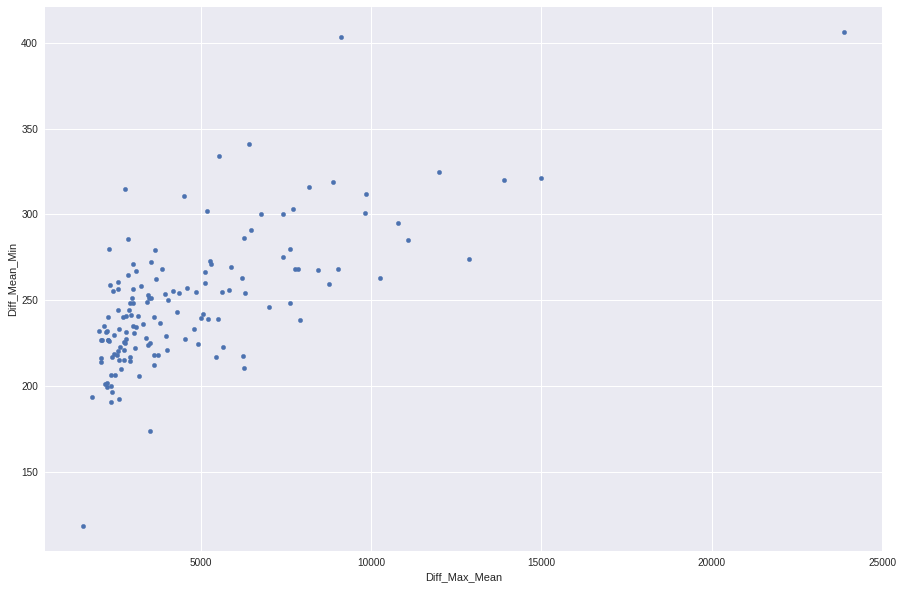

In [0]:
#Breve Exploración
#Se trata de explorar la asimetría de el 
#numero de ordenes por semana

data.filter(items=['week','num_orders'],axis=1)\
    .groupby('week')\
    .agg(['mean','max','min'])\
    .assign(Diff_Max_Mean=lambda X: X[('num_orders','max')]-X[('num_orders','mean')],
            Diff_Mean_Min=lambda X: X[('num_orders','mean')]-X[('num_orders','min')]
           ).plot.scatter(x='Diff_Max_Mean',y='Diff_Mean_Min')

No se observa nada realmente considerable o algo que nos permite concluir algo, pero si observamos la distribución estimada la variable **num_orders**, se aprecia que tiene cola pesada. Así que aplicamos la transformación logaritmo sobre esta variable y aplicamos el mismo proceso y generamos la misma gráfica

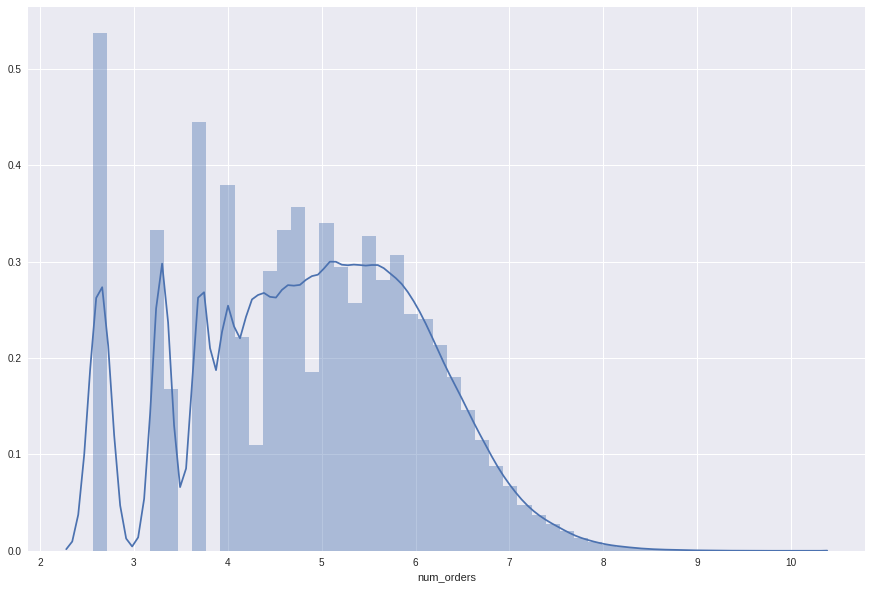

In [0]:
#Distribución de num_orders despues de log()
sns.distplot(np.log(data.num_orders))

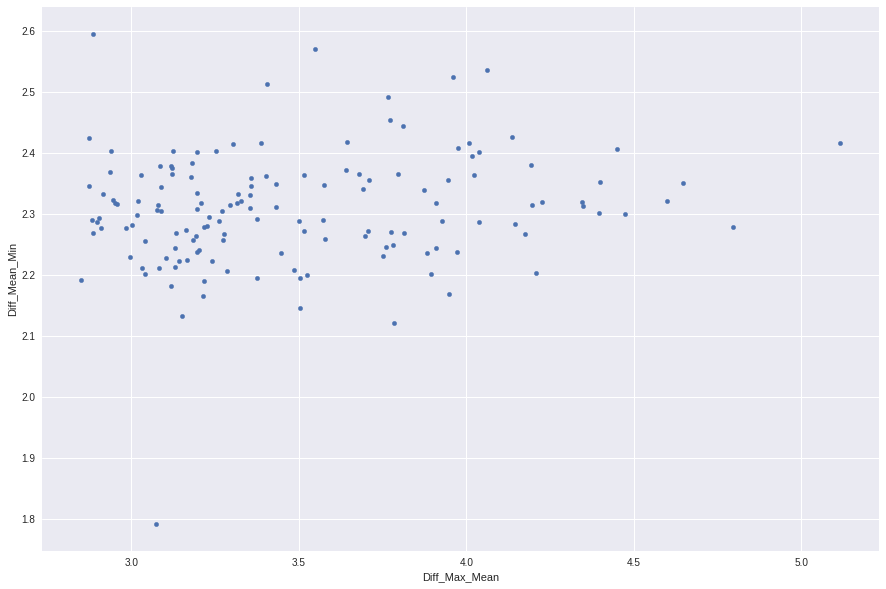

In [0]:
# Se transforma la columna num_orders 
# y luego se aplcia el mismo proceso

data.filter(items=['week','num_orders'],axis=1)\
    .assign(num_orders=lambda X: np.log(X['num_orders']))\
    .groupby('week')\
    .agg(['mean','max','min'])\
    .assign(Diff_Max_Mean=lambda X: X[('num_orders','max')]-X[('num_orders','mean')],
            Diff_Mean_Min=lambda X: X[('num_orders','mean')]-X[('num_orders','min')]
           ).plot.scatter(x='Diff_Max_Mean',y='Diff_Mean_Min')

Con el cambio de "escala" en la variable **num_orders** se aprecia que es más o menos constante la relación entre las dos variables. Parece que hay una relación lineal entre las dos variables.

Para complementar nuestro análisis, podemos pintar cada punto por la semana que le corresponde, con el fin de analizar mejor los datos.

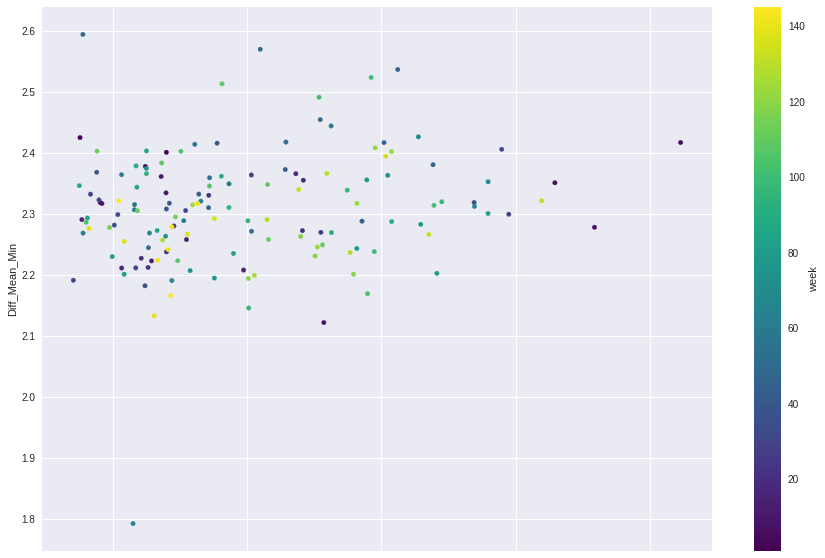

In [0]:
#Exploramos como se comporta por semana la asimetría 
#entre los dos lados de las distribuciones.

data.filter(items=['week','num_orders'],axis=1)\
    .assign(num_orders=lambda X: np.log(X['num_orders']))\
    .groupby('week',as_index=False)\
    .agg(['mean','max','min'])\
    .assign(Diff_Max_Mean=lambda X: X[('num_orders','max')]-X[('num_orders','mean')],
            Diff_Mean_Min=lambda X: X[('num_orders','mean')]-X[('num_orders','min')]
           ).reset_index()[['week','Diff_Max_Mean','Diff_Mean_Min']]\
    .plot.scatter(x='Diff_Max_Mean',y='Diff_Mean_Min',c='week',colormap='viridis')

Si bien, la gráfica no muestra nada definitivo. Permite observar que las primeras semanas muestran que de la media y el máximo es mayor y por otro lado, las semanas entre el número 60 y 100, muestran que tiene una mayor distancia entre el valor medio y el minimo.

La gráfica no permite concluir algo muy radical, pero ayuda a empezar un análisis.

Al contar con datos respecto a "semanas" (week), resulta natural preguntarse respecto al comportamiento del número de ordenes con respecto al tiempo (week). El siguiente código nos permite visualizarlo.

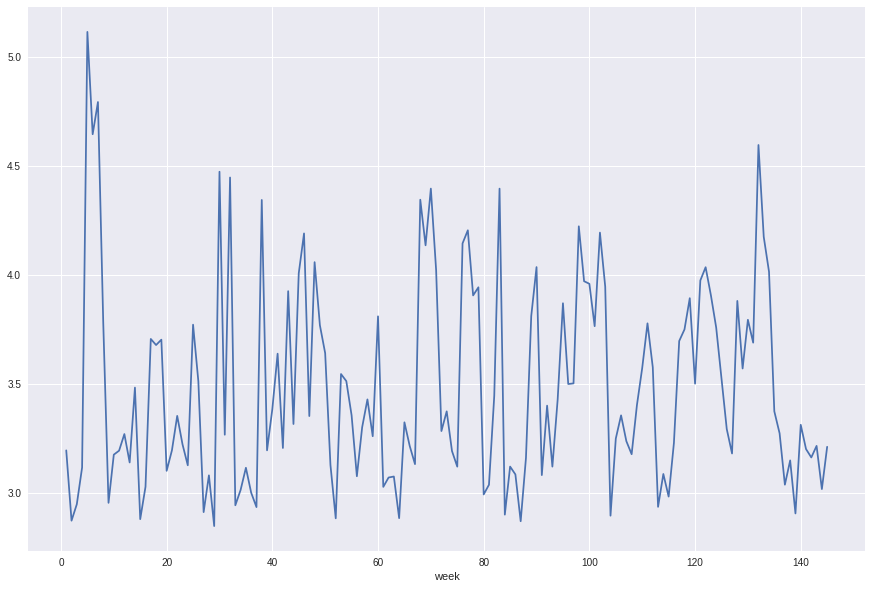

In [0]:
#Exploración de la estacionalidad del número de ordenes.
data.filter(items=['week','num_orders'],axis=1)\
    .assign(num_orders=lambda X: np.log(X['num_orders']))\
    .groupby('week',as_index=False)\
    .agg(['mean','max'])\
    .assign(Diff_Max_Mean=lambda X: X[('num_orders','max')]-X[('num_orders','mean')],
           )['Diff_Max_Mean']\
    .plot()

La gráfica muestra que efectivamente hay cierta estacionalidad en el número de ordenes, algunas semanas parecen con cantidades muy altas y otras bajas. Esta dinámica ayuda a empezar a pensar en como procesar los datos para tener cuidado al momento de iniciar la contrucción de algún modelo.

¿Qué se podría cambiar en los codigos anteriores?
¿Son muy diferentes los códigos?

Bueno, la respuesta a la primera pregunta es abierta, pero se puede usar otra medida en lugar de la "mean", se puede usar la "mediana". La diferencia radica en que la mediana siempre se encuentra en "medio" de la distribución, vs la media que es sensible a los outliers.

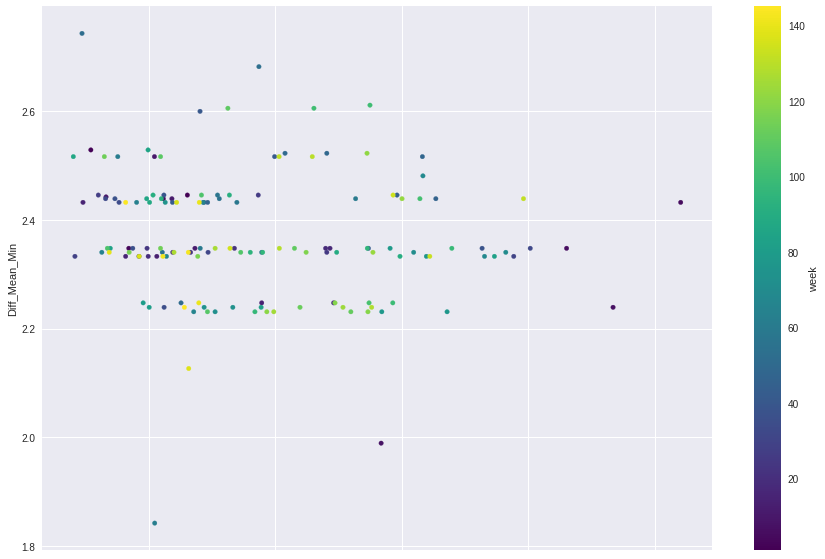

In [0]:
#Practicamente se cambia una palabra solamente.
data.filter(items=['week','num_orders'],axis=1)\
    .assign(num_orders=lambda X: np.log(X['num_orders']))\
    .groupby('week',as_index=False)\
    .agg(['median','max','min'])\
    .assign(Diff_Max_Mean=lambda X: X[('num_orders','max')]-X[('num_orders','median')],
            Diff_Mean_Min=lambda X: X[('num_orders','median')]-X[('num_orders','min')]
           ).reset_index()[['week','Diff_Max_Mean','Diff_Mean_Min']]\
    .plot.scatter(x='Diff_Max_Mean',y='Diff_Mean_Min',c='week',colormap='viridis')

Resulta interesante la gráfica, ahora si muestra una "segregación" muy definida entre las semanas.  Lo cual ayuda a poderse preguntar de manera más especifica por revisar ciertas semanas para ver los datos asociados a esas semanas con mayor cuidado.

Igual a la gráfica del número de ordenes vs la semana, se puede usar ahora la mediana en lugar de la media para replicar la gráfica.

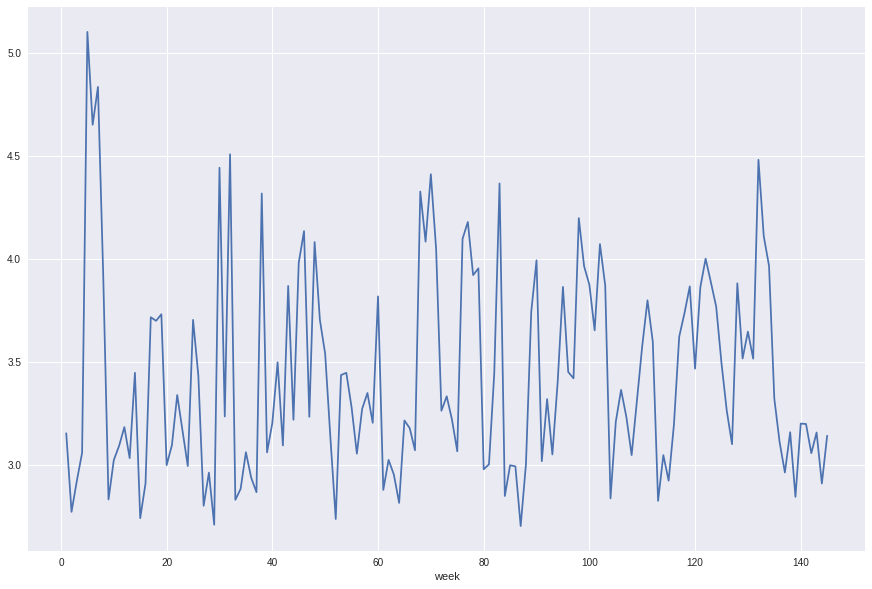

In [0]:
#Exploración de la estacionalidad

data.filter(items=['week','num_orders'],axis=1)\
    .assign(num_orders=lambda X: np.log(X['num_orders']))\
    .groupby('week',as_index=False)\
    .agg(['median','max'])\
    .assign(Diff_Max_Median=lambda X: X[('num_orders','max')]-X[('num_orders','median')],
           )['Diff_Max_Median']\
    .plot()

La anterior gráfica no muestra algún comportamiento muy diferentes con respecto a la misma gráfica realizada con la media (mean).

Ahora agregamos algo más al análisis. Consideramos un center_id y comparamos el comprotamiento de los precios vs el número de ordenes.

In [0]:
#Se toman dos indices para agrupar
(data.filter(items=['week','center_id','checkout_price', 'base_price','num_orders'],axis=1)
    .groupby(['week','center_id'])
    .agg('mean')
    .assign(Diff_Checkout_Base=lambda X:X['base_price']-X['checkout_price'])
    .head())

checkout_price  base_price  num_orders  Diff_Checkout_Base
week center_id                                                            
1    10             325.925778  348.601556  562.822222           22.675778
     11             316.569762  340.481190  419.904762           23.911429
     13             326.011333  353.068889  656.244444           27.057556
     14             318.120000  342.935897  236.307692           24.815897
     17             315.640000  343.723750  206.150000           28.083750

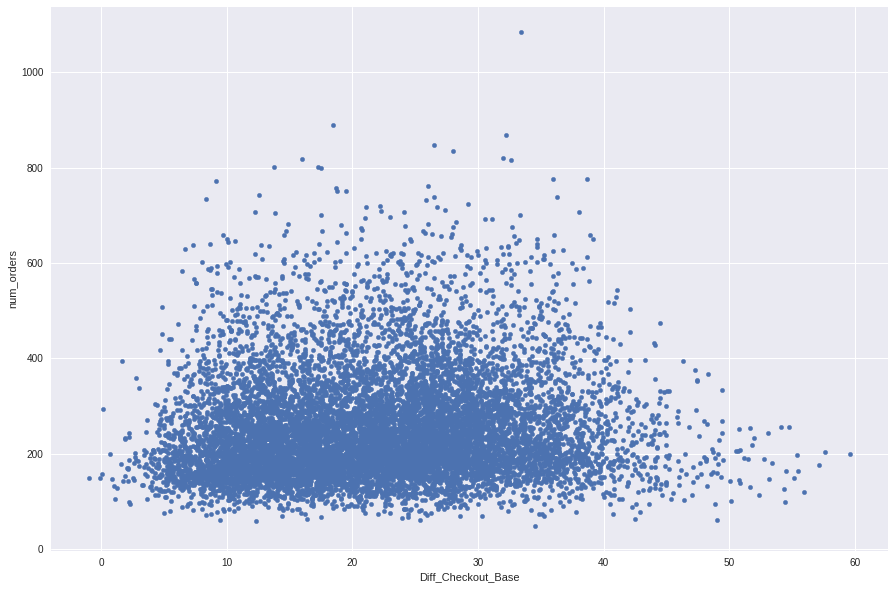

In [0]:
#Se genera la gráfica para explor los datos.

(data.filter(items=['week','center_id','checkout_price', 'base_price','num_orders'],axis=1)
    .groupby(['week','center_id'])
    .agg('mean')
    .assign(Diff_Checkout_Base=lambda X:X['base_price']-X['checkout_price'])
    .plot.scatter(x='Diff_Checkout_Base',y='num_orders'))

Se probó cambiar la escala, para tratar de ver si eso afecta a las gráficas.

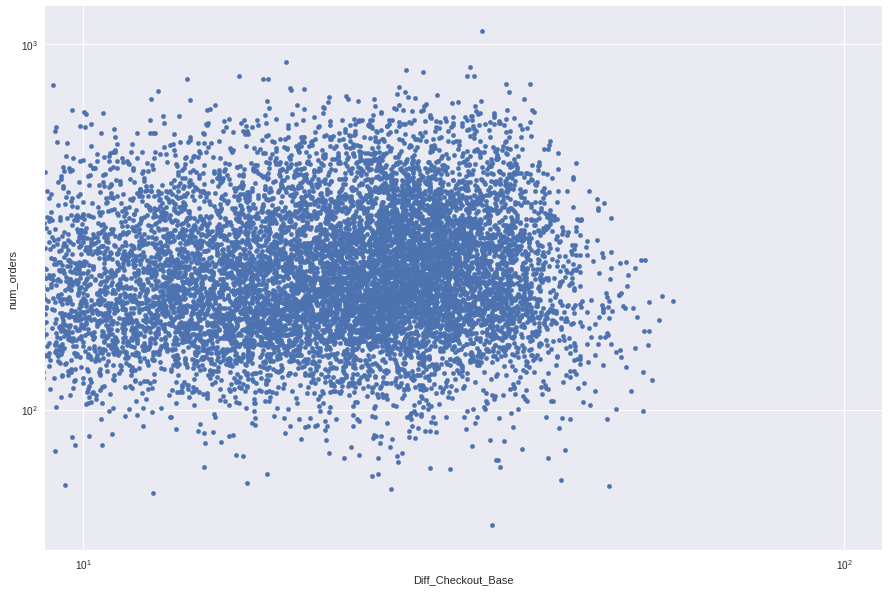

In [0]:
(data.filter(items=['week','center_id','checkout_price', 'base_price','num_orders'],axis=1)
    .groupby(['week','center_id'])
    .agg('mean')
    .assign(Diff_Checkout_Base=lambda X:X['base_price']-X['checkout_price'])
    .plot.scatter(x='Diff_Checkout_Base',y='num_orders'))

plt.yscale('log')
plt.xscale('log')

No se ve muy claro algo en el análisis o en la gráfica, pero se hace notar el cambio de escala.

Para tratar de mejorar la exploración , se pinta con escala de colores de blanco a negro las semanas.

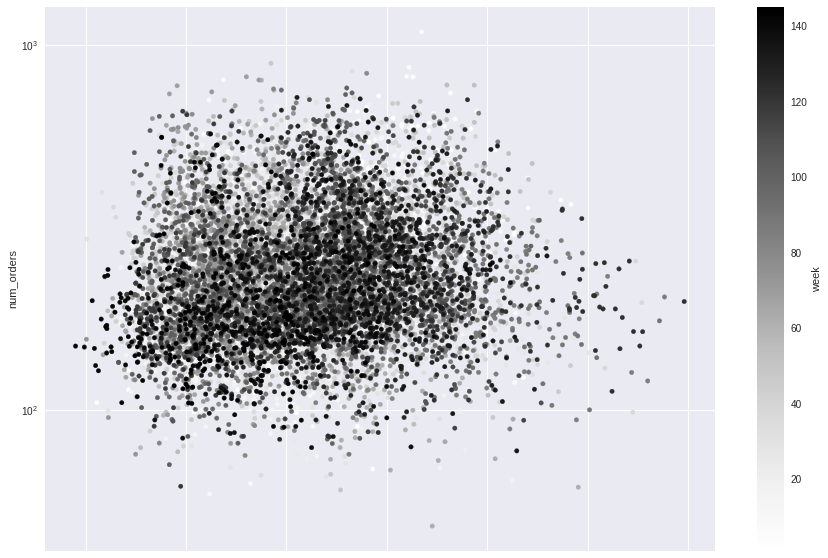

In [0]:
#solo se agrega color a los puntos con respecto a la semana
(data.filter(items=['week','center_id','checkout_price', 'base_price','num_orders'],axis=1)
    .groupby(['week','center_id'])
    .agg('mean')
    .assign(Diff_Checkout_Base=lambda X:X['base_price']-X['checkout_price'])
    .reset_index()
    .plot.scatter(x='Diff_Checkout_Base',y='num_orders',c='week'))

plt.yscale('log')

Los colores de blanco a negro, no muestran algún patrón. Cambiamos la paleta de colores para tratar de distinguir mejor las semanas.

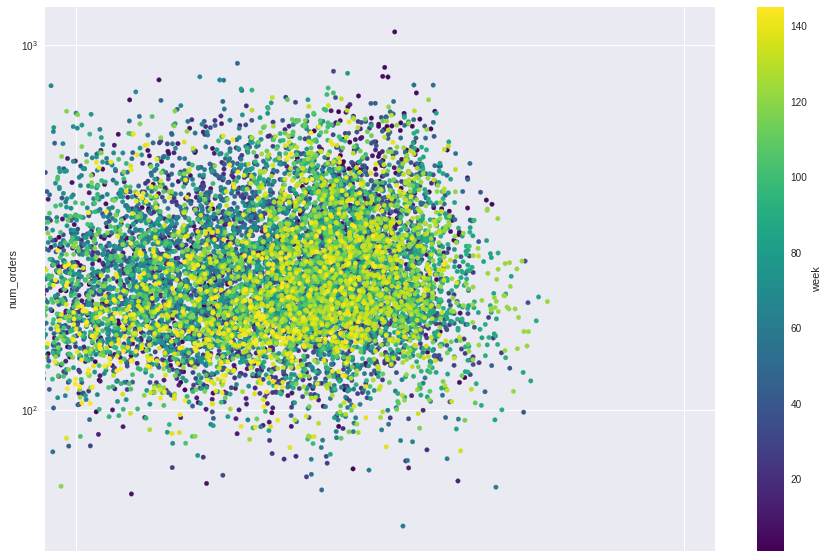

In [0]:
#Se cambia la paleta de colore colormap='viridis'

(data.filter(items=['week','center_id','checkout_price', 'base_price','num_orders'],axis=1)
    .groupby(['week','center_id'])
    .agg('mean')
    .assign(Diff_Checkout_Base=lambda X:X['base_price']-X['checkout_price'])
    .reset_index()
    .plot.scatter(x='Diff_Checkout_Base',y='num_orders',c='week',colormap='viridis'))

plt.yscale('log')
plt.xscale('log')

La gráfica muestra cierto punto donde todos los puntos estan "centrados", pero parece que las primeras semanas son más dispersas y las últimas más centradas.

Al igual del análisis anterior sobre la "estacionalidad", se puede ahora tratar de ver el comportamiento del "numero de ordes" con respecto a diferentes agrupaciones o GroupBy() 

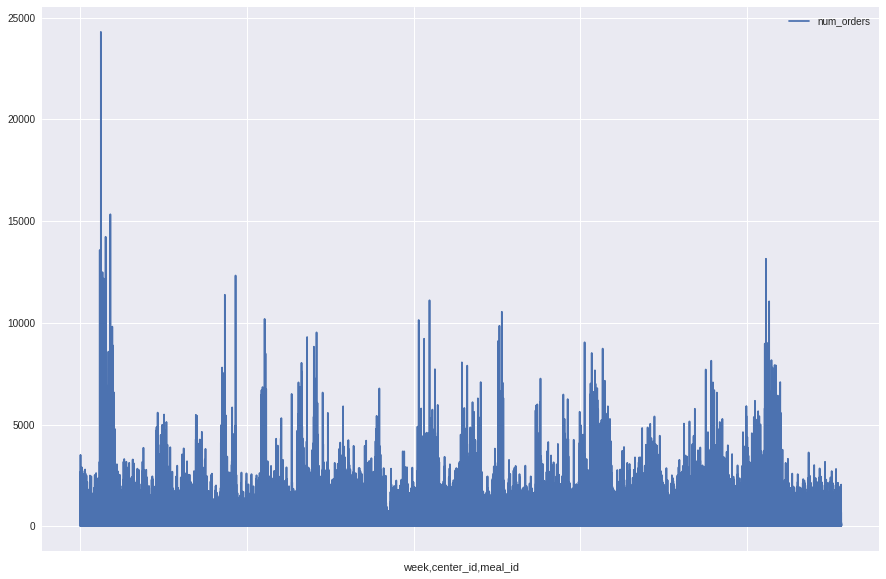

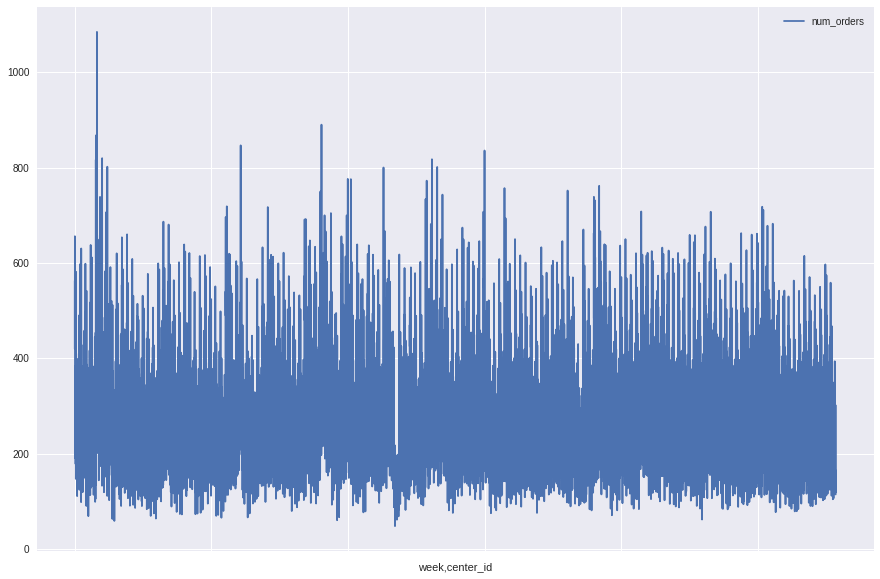

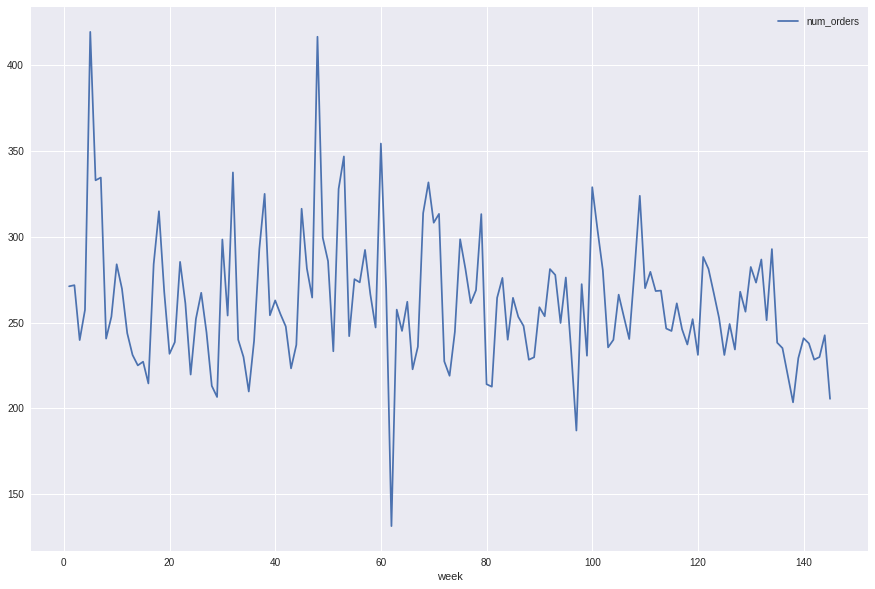

In [0]:
(data.filter(items=['week','center_id','meal_id','num_orders'],axis=1)
    .groupby(['week','center_id','meal_id'])
    .agg('mean')
    .plot())
plt.show()

(data.filter(items=['week','center_id','num_orders'],axis=1)
    .groupby(['week','center_id'])
    .agg('mean')
    .plot())

plt.show()

(data.filter(items=['week','num_orders'],axis=1)
    .groupby(['week'])
    .agg('mean')
    .plot())


Con las tres gráficas se muestra que hay puntos críticos que persisten sea por el lugar (center_id) o por el tipo de producto (meal_id). No se muestra algún patron entre las diferentes agrupaciones.

Después de estos análisis, uno también podria preguntarse respecto a la relación entre **center_id** y **meal_id**. 

In [0]:
L=data.pivot_table(index='center_id',columns='meal_id',values='num_orders',aggfunc='mean')
L.head()

meal_id,1062,1109,1198,1207,1216,1230,1247,1248,1311,1438,...,2581,2631,2640,2664,2704,2707,2760,2826,2867,2956
center_id,,,,,,,,,,,,,,,,,,,,,
10,949.944828,1528.862069,347.537931,215.493056,146.433566,158.786207,34.401639,225.862069,604.868966,70.986014,...,401.827586,320.579310,421.241379,828.296875,420.304348,1383.689655,350.427586,918.034483,191.427586,284.707317
11,829.551724,1073.744828,477.298611,174.204225,70.804348,193.326389,24.653465,132.281690,681.448276,88.141844,...,231.827586,136.701389,271.400000,625.559322,284.271429,1242.848276,246.262069,878.427586,119.775362,109.382716
13,1096.586207,1852.806897,618.910345,144.472222,146.678322,151.872340,82.943662,196.625000,787.772414,218.840278,...,385.572414,243.006897,422.986207,868.617188,601.911765,2061.551724,601.206897,1337.144828,256.344828,307.951807
14,286.972414,404.510345,218.750000,192.181818,35.709924,185.873239,22.890110,76.500000,194.027586,34.676190,...,190.479167,79.563380,78.678571,214.708661,53.088889,547.117241,72.873239,372.179310,67.102273,NaN
17,363.241379,482.386207,180.248276,124.822695,36.078740,121.231884,25.639640,61.722628,230.924138,33.419753,...,146.338028,57.218978,149.701389,285.296875,115.318841,522.289655,154.986207,363.531034,94.181818,NaN


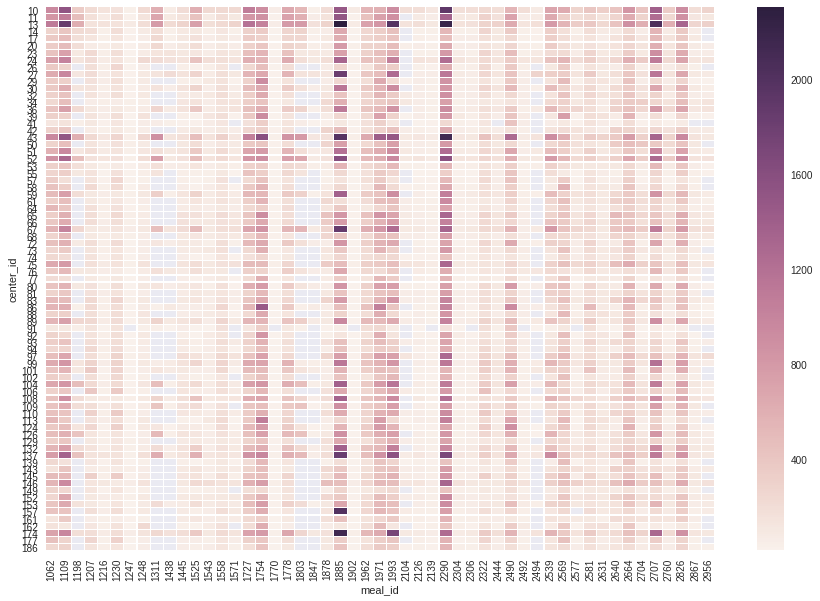

In [0]:
#Mapa de calor
sns.heatmap(L,linewidths=0.1)

El mapa de calor nos permite explorar las relaciones entre center_id y meal_id, esto ayuda a pensar que los meal_id pueden ser clasificados o puede incentivar a crear nuevas variables.

**Conclusion**: El análisis no fue exahustivo, ni mucho menos revisamos todas las variables. Los ejemplos si se observa con cuidado muestran como mediante un mismo código y ligeros cambios se pueden ir construyendo la exploración. Las diferencias entre código y código es minimo, eso es lo relevante del ejercicio. 

La idea de los ejemplos es mostrar los pasos "evolutivos" tanto del código como de la exploración. Este tipo de código fue hecho en *"idiomatic pandas"* ( esto usando la expresión de [Tom Augspurger](https://tomaugspurger.github.io/)) 

## Mini proyecto 2

Los siguientes datos corresponde a una portal de ventas por internet. La intención es explorar los datos para detectar productos con similares descripciones pero con precios diferentes.

Los datos se pueden descargar desde la fuente original:

* [Marcari](https://www.kaggle.com/c/mercari-price-suggestion-challenge/data)

Para empezar el ejercicio, se cargan los datos al entorno y se limpia el entorno.



In [0]:
%reset -f

In [0]:
#Se cargan los datos  

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
plt.rcParams['figure.figsize'] = 15, 10


In [0]:
#Solo se leen una cantidad de nrows.
df=pd.read_csv('train.tsv',delimiter='\t',encoding='utf-8',nrows=1000000)
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [0]:
#Descripción en general 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
train_id             1000000 non-null int64
name                 1000000 non-null object
item_condition_id    1000000 non-null int64
category_name        995705 non-null object
brand_name           573454 non-null object
price                1000000 non-null float64
shipping             1000000 non-null int64
item_description     999998 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 61.0+ MB


Con este método se hace notar que hay variables como bran_name y category_name, que cuentan con registros con datos no estandar. Quizás son missing values o no contienen datos.

Ahora como primera etapa exploramos las estadísticas básicas del valor de precios.

In [0]:
df.price.describe()

count    1000000.000000
mean          26.744522
std           38.664065
min            0.000000
25%           10.000000
50%           17.000000
75%           29.000000
max         2009.000000
Name: price, dtype: float64

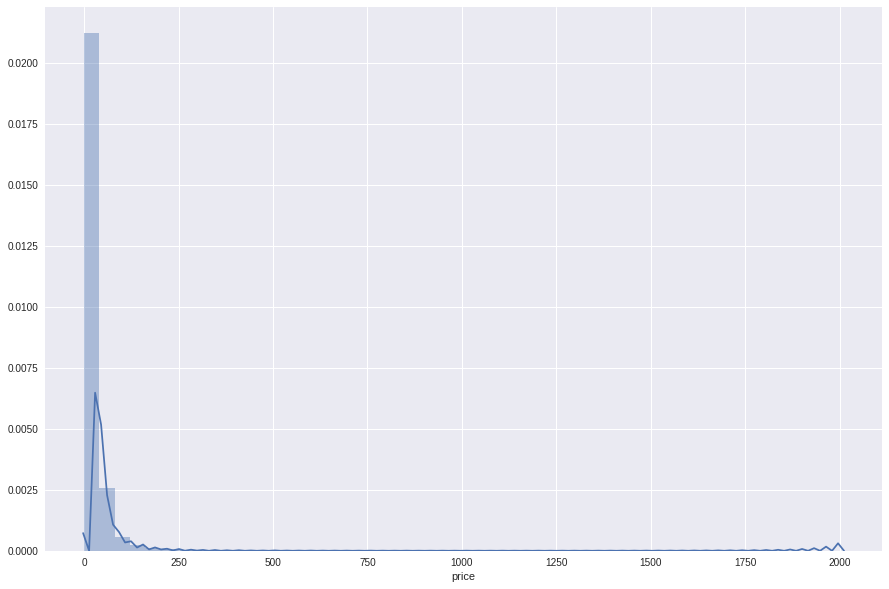

In [0]:
#Distribución de Price
sns.distplot(df.price)

El objetivo de explorar este conjunto de datos es recordar las dos etapas y sus subetapas de la metodología CRISP-DM:

* Entendimiento de los Datos.
  * Colección de Datos
  * Propiedades de los Datos
  * Calidad de los Datos

* Preparación de los Datos.
  * Limpieza
  * Transformación
  * Unión de Tablas
  * Formato



Si bien el objetivo es contruir un modelo supervizado( una regresión), para el ejemplo nos interesa usar Pandas para realizar parte de las dos etapas mencionadas de la metodología.


### Entendimiento de los Datos

Si bien no nos preocupamos por la collección de datos o recollección,  podemos revisar algunas de las propiedades:

* Tipo de Datos
* Como se encuentran los datos en el archivo
* La calidad, en cuanto a los missing values o los textos

In [0]:
# Tipo de datos
df.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

Empezamos a revisar el Target (price), si bien es cargado como un número float. Vemos su estadística básica.

In [0]:
#Se ejecuto el mismo código antetiormente
df.price.describe()

count    1000000.000000
mean          26.744522
std           38.664065
min            0.000000
25%           10.000000
50%           17.000000
75%           29.000000
max         2009.000000
Name: price, dtype: float64

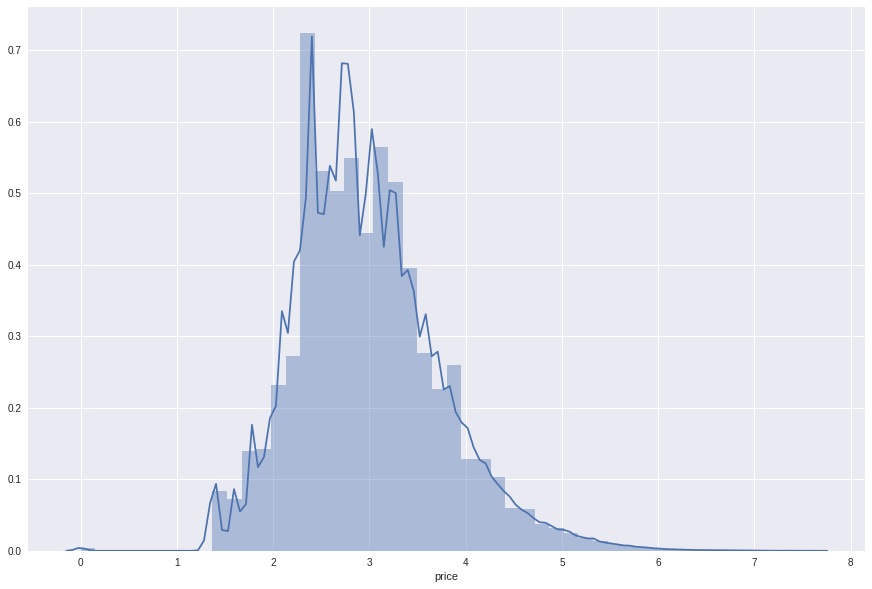

In [0]:
#Se transforma por log(1+x) para cambiar la escala
sns.distplot(np.log1p(df.price))

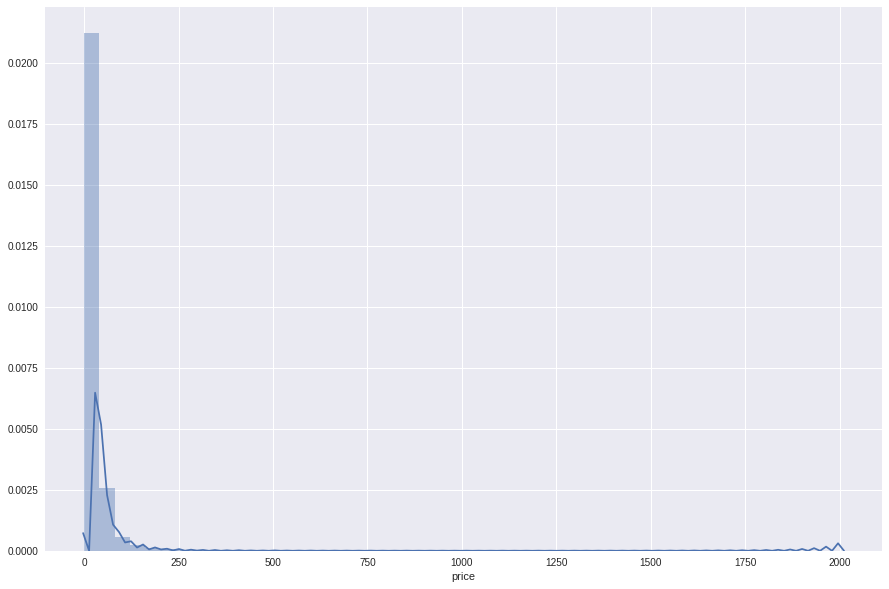

In [0]:
#Sin tranformar la variable
sns.distplot(df.price)

Se observa que haciendo la tranformación log(1+x) sobre la variable "price", la forma de la distribución se ve más en forma de campana, sigue mostrando que las colas son pesadas a la derecha( una cola pesada) por los valores muy grandes y al lado izquierdo se trunca conforme se acerca a los valores más pequeños.

Un par de variables que se pueden explorar de manera más o menos sencilla, son :
* item_condition_id
* shipping

Parecen binarias(0/1), pero para conformarlo se revisan

In [0]:
#Se explora el balance de las categorias
df.loc[:,'shipping'].value_counts()

0    552590
1    447410
Name: shipping, dtype: int64

In [0]:
#Se explora el balance de las categorias
df.loc[:,'item_condition_id'].value_counts()

1    432011
3    291708
2    253194
4     21463
5      1624
Name: item_condition_id, dtype: int64

A primera vista se observa que la variable "shiṕping" parece balanceada y por otro lado, 'item_concidtion_id' parece que cuenta con un par de categorias (4 y 5) que representan poco porcentualmente.

In [0]:
#Se explora el balance de las categorias pero en %
df.loc[:,'shipping'].value_counts()\
  .div(df.shape[0])

0    0.55259
1    0.44741
Name: shipping, dtype: float64

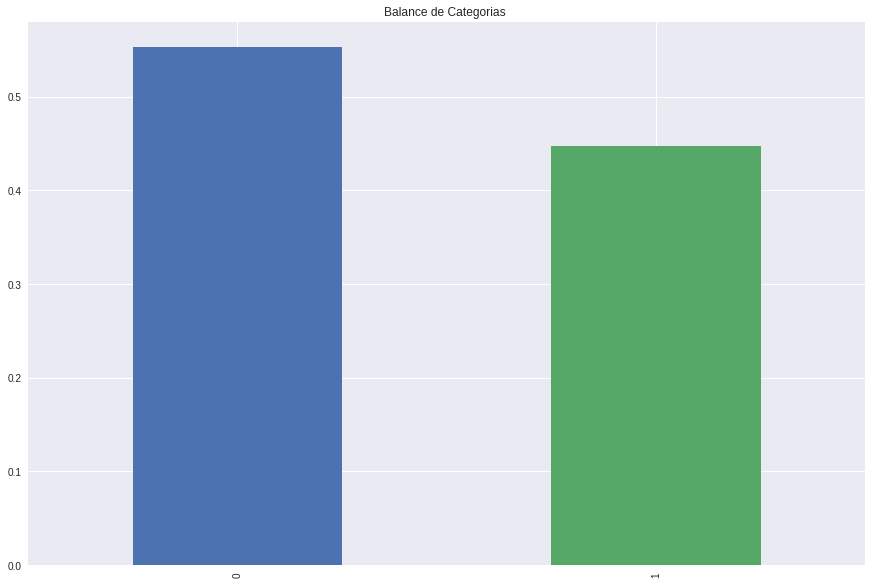

In [0]:
#Se contruye la gráfica de barras
df.loc[:,'shipping'].value_counts()\
  .div(df.shape[0])\
   .plot(kind='bar',title='Balance de Categorias ')

In [0]:
#Se explora el balance de las categorias en %
df.loc[:,'item_condition_id']\
  .value_counts()\
  .div(df.shape[0])

1    0.432011
3    0.291708
2    0.253194
4    0.021463
5    0.001624
Name: item_condition_id, dtype: float64

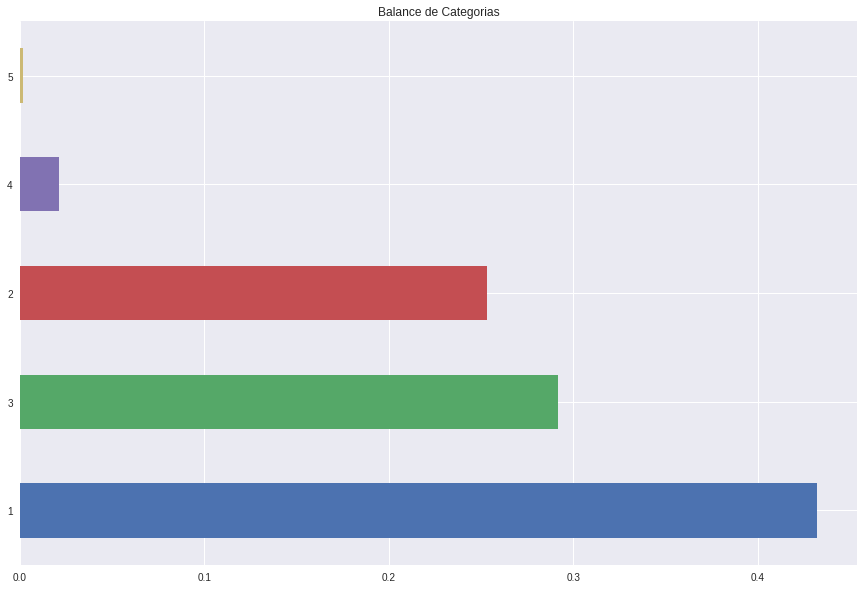

In [0]:
#Se explora el balance de las categorias en %
# y se contruye su gráfica de barras
df.loc[:,'item_condition_id']\
  .value_counts()\
  .div(df.shape[0])\
  .plot(kind='barh',title='Balance de Categorias')


Ahora podemos explorar la relación entre las categorias con los valores de los precios. 

In [0]:
#Construimos un DataFrame con columnas y filas como categorias
# y se toma la media del precio en cada una. 
df.filter(items=['price','shipping','item_condition_id'],axis=1)\
  .pivot_table(index='item_condition_id',columns='shipping',values='price',aggfunc='mean')\
  .head()

shipping,0,1
item_condition_id,,
1,33.007404,21.451433
2,29.607124,24.308674
3,28.024586,23.655383
4,25.378964,22.205602
5,32.379477,27.658206


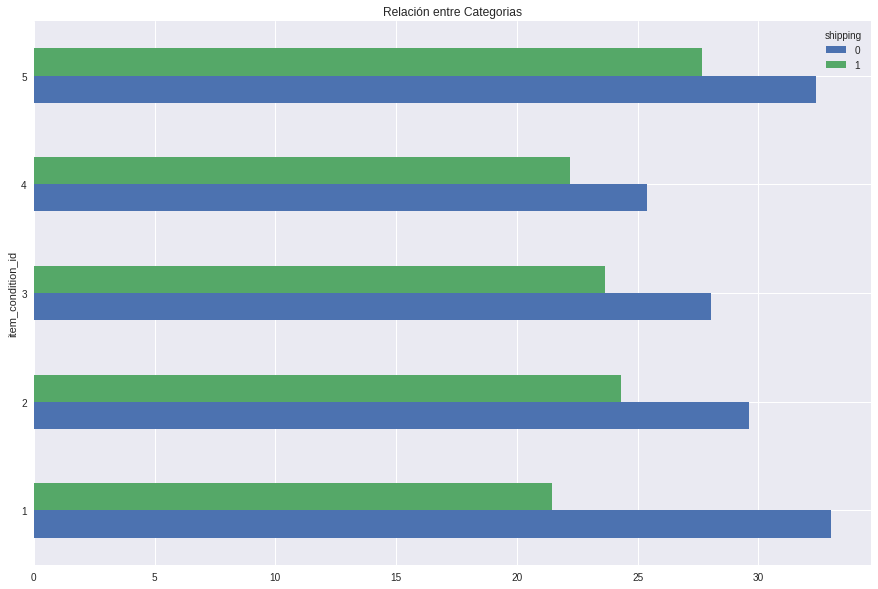

In [0]:
#Gráfica de la relación entre variables
df.filter(items=['price','shipping','item_condition_id'],axis=1)\
  .pivot_table(index='item_condition_id',columns='shipping',values='price',aggfunc='mean')\
  .plot.barh(title='Relación entre Categorias')

Lo que se hizo anteiormente, donde se trata de ver la relación entre categorias con el valor medio de los precios. Se puede hacer pero ahora solo para explorar la cantidad de registros que se tienen por categoria.

Para esto, en lugar de estimar 'mean' para el precio, solo se contabiliza y se usa 'count' para ello.

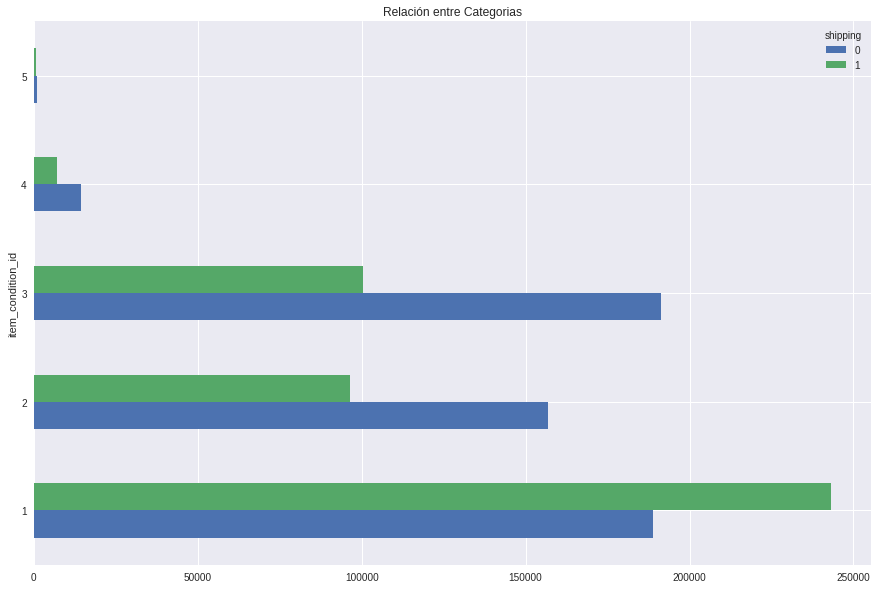

In [0]:
df.filter(items=['price','shipping','item_condition_id'],axis=1)\
  .pivot_table(index='item_condition_id',columns='shipping',values='price',aggfunc='count')\
  .plot.barh(title='Relación entre Categorias')

Se observa que similar a la gráfica de las categorias de la variable 'item_condition_id' , las categorias 4 y 5 muestran pocos registros o apariciones en los datos.

Para "normalizar" esta análisis, calculamos el porcentaje que representa para cada una de las categorias el tener valor 0/1 de 'shipping' vs 'item_condition_id'. Para eso necesitamos dividir el DataFrame y estimar los porcentajes por cada categoria.

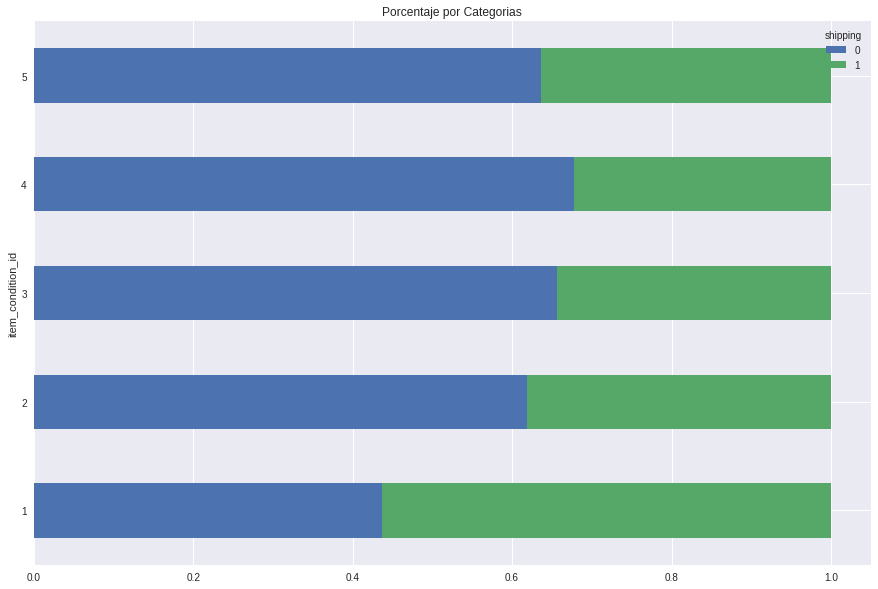

In [0]:
#Se contruye el mismo DF anterior y se divide por si mismo

L=df.filter(items=['price','shipping','item_condition_id'],axis=1)\
  .pivot_table(index='item_condition_id',columns='shipping',values='price',aggfunc='count')\
 
L.div(L.sum(1),axis=0).plot(kind='barh',stacked=True,title='Porcentaje por Categoriasd')  

Se observa que la categoría 1 de la variable 'item_condition_id', qué es la más representativa muestra un comportamiento diferente entre los porcentajes de categorias de la variable 'shipping'. Lo cual sugiere que se puede explorar con máyor detalle esta categorias.

El resto de variables son cadenas, en las lecciones anteriores se mencionaron pero no se hicieron ejemplos a detalle de como procesar cadenas con Pandas. Cuanta con todos los métodos necesarios para procesar cadenas en los DataFrames o las Series. Para este análisis solo exploramos detalles menores de estas variables.

In [0]:
#Solo se explora el tamaño de la cadena en cada una de las variables

df.filter(items=['name', 'category_name','brand_name', 'item_description'],axis=1)\
  .assign(Lenght_name=lambda X:X['name'].apply(lambda x: len(x.split(' '))),
          Lenght_category_name=lambda X:X['category_name'].apply(lambda x: len(str(x).split(' '))),
          Lenght_brand_name=lambda X:X['brand_name'].apply(lambda x: len(str(x).split(' '))),
          Lenght_description=lambda X:X['item_description'].apply(lambda x: len(str(x).split(' '))))\
  .head()
          

,name,category_name,brand_name,item_description,Lenght_name,Lenght_category_name,Lenght_brand_name,Lenght_description
0,MLB Cincinnati Reds T Shirt Size XL,Men/Tops/T-shirts,NaN,No description yet,7,1,1,3
1,Razer BlackWidow Chroma Keyboard,Electronics/Computers & Tablets/Components & P...,Razer,This keyboard is in great condition and works ...,4,5,1,36
2,AVA-VIV Blouse,Women/Tops & Blouses/Blouse,Target,Adorable top with a hint of lace and a key hol...,2,3,1,29
3,Leather Horse Statues,Home/Home Décor/Home Décor Accents,NaN,New with tags. Leather horses. Retail for [rm]...,3,4,1,32
4,24K GOLD plated rose,Women/Jewelry/Necklaces,NaN,Complete with certificate of authenticity,4,1,1,5


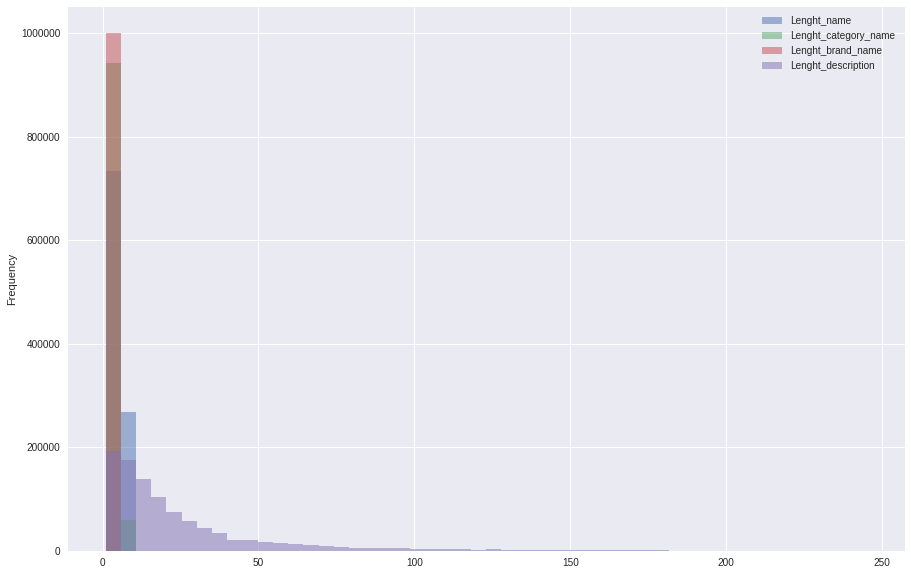

In [0]:
#Exploramos el Histograma de las longitudes de las cadenas

df.filter(items=['name', 'category_name','brand_name', 'item_description'],axis=1)\
  .assign(Lenght_name=lambda X:X['name'].apply(lambda x: len(x.split(' '))),
          Lenght_category_name=lambda X:X['category_name'].apply(lambda x: len(str(x).split(' '))),
          Lenght_brand_name=lambda X:X['brand_name'].apply(lambda x: len(str(x).split(' '))),
          Lenght_description=lambda X:X['item_description'].apply(lambda x: len(str(x).split(' '))))\
  .filter(items=['Lenght_name','Lenght_category_name','Lenght_brand_name','Lenght_description'],axis=1)\
  .plot.hist(alpha=0.5,bins=50)


In [0]:
#La estadística descritiva de la longitud de las cadenas

df.filter(items=['name', 'category_name','brand_name', 'item_description'],axis=1)\
  .assign(Lenght_name=lambda X:X['name'].apply(lambda x: len(x.split(' '))),
          Lenght_category_name=lambda X:X['category_name'].apply(lambda x: len(str(x).split(' '))),
          Lenght_brand_name=lambda X:X['brand_name'].apply(lambda x: len(str(x).split(' '))),
          Lenght_description=lambda X:X['item_description'].apply(lambda x: len(str(x).split(' '))))\
  .filter(items=['Lenght_name','Lenght_category_name','Lenght_brand_name','Lenght_description'],axis=1)\
  .describe()


,Lenght_name,Lenght_category_name,Lenght_brand_name,Lenght_description
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,4.399863,2.636063,1.291787,25.685190
std,1.654942,1.540022,0.591890,30.373183
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000,7.000000
50%,4.000000,2.000000,1.000000,15.000000
75%,6.000000,4.000000,1.000000,31.000000
max,17.000000,8.000000,8.000000,245.000000


## Notas finales:

Los ejemplos tratan de mostrar que sin hacer cambios muy radicales entre los códigos se puede iniciar un proceso de análisis y empezar a explorar con más detalle las propiedades de los datos y su relación entre variables.

Si bien en otras lecciones no se mencionaron a detalle los métodos para procesar cadenas en Pandas, se cuenta con una amplia cantidad de métodos los cuales permiten hacer una análisis sobre este tipo de datos en los DataFrames.


## Referencias y Créditos:

Libros:

* [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793)


Cŕéditos:
Los datos usados para los ejemplos de SQL son parte de set de datos de test de [Pandas](https://github.com/pandas-dev).

Los datos usados para el ejemplo del Análisis de Datos son correspondientes al 
[genpact-machine-learning-hackathon](https://datahack.analyticsvidhya.com/contest/genpact-machine-learning-hackathon/#problem_statement).

El segundo ejemplo de análisis de datos corresponden a datos de [Mercari](https://www.mercari.com/). Los datos pueden ser descargados desde Kaggle:

* https://www.kaggle.com/c/mercari-price-suggestion-challenge/data
      